In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [2]:
test = pd.read_csv("/Users/josephmata/Documents/NYC Data Science Academy/Projects/Ksales/test.csv")
train= pd.read_csv("/Users/josephmata/Documents/NYC Data Science Academy/Projects/Ksales/train.csv")

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


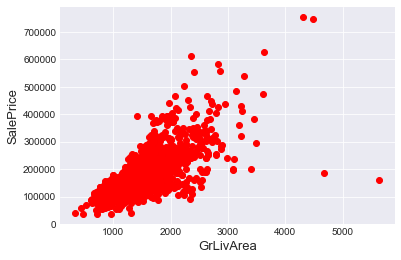

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'], color = "red")
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [7]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


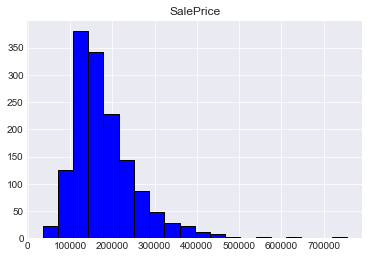

In [8]:
y = train['SalePrice']
plt.title('SalePrice')

#y.plot.hist(COLOR = "green", bins = 20, ec = "black")
plt.hist(y,COLOR = "blue", bins = 20, ec = "black")
plt.show()

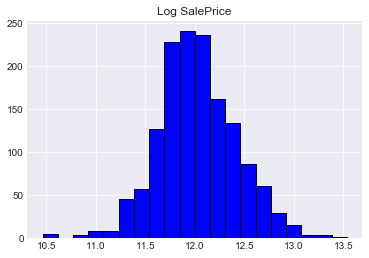

In [9]:
#normalize target variable
y = np.log1p(y)
plt.title('Log SalePrice')
plt.hist(y,COLOR = "blue", bins = 20, ec = "black")
plt.show()


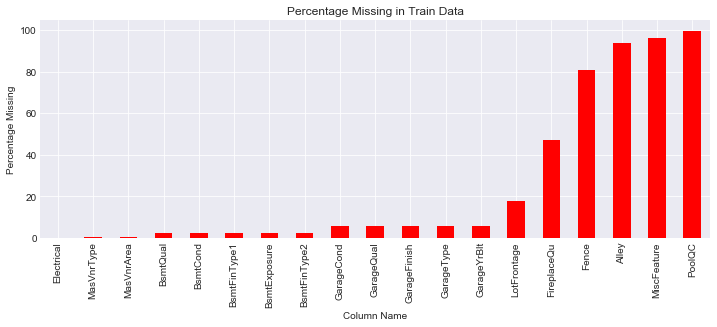

In [10]:
#missingness in train

missing_train = train.isnull().sum()/len(train.index)*100
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Train Data")

missing_train.plot.bar(width= .5,color = "red",figsize =(12,4))

In [11]:
#how many columns missing info
len(missing_train)

19

Text(0.5,1,'Percentage Missing in Train Data')

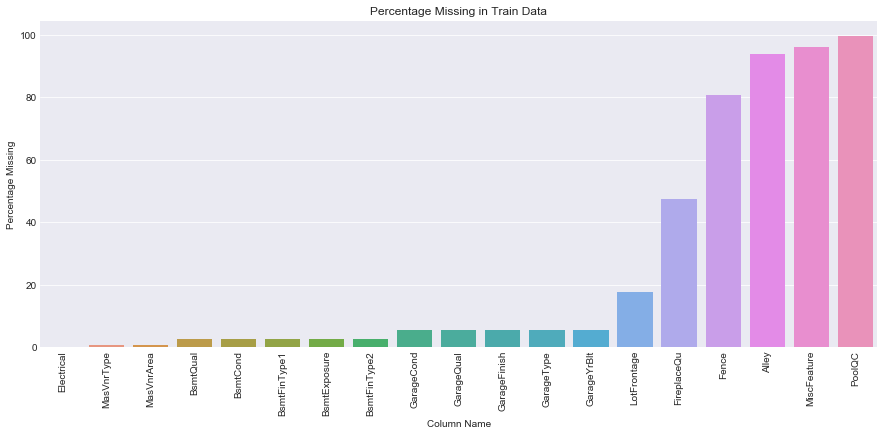

In [12]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_train.index, y =missing_train)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Train Data")

Text(0.5,1,'Percentage Missing in Test Data')

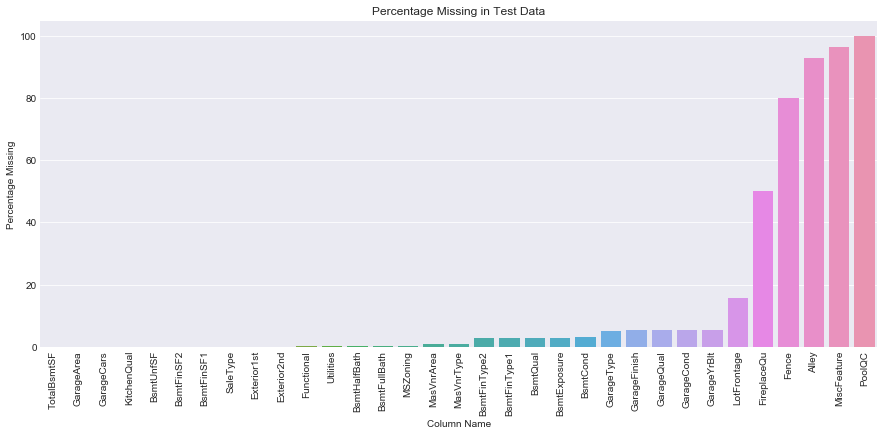

In [13]:
#missingness in train

missing_test = test.isnull().sum()/len(test.index)*100
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_test.index, y =missing_test)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Test Data")

In [14]:
#how many columns missing info
len(missing_test)

33

In [15]:
#feature engineering

train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


#drop traget 
train = train.drop('SalePrice', axis=1)

#concat both for feature engineering


train_num = len(train)
concat = pd.concat(objs=[train, test], axis=0)

In [16]:
concat.shape

(2917, 79)

In [17]:
#data description says NA means typical
concat["Functional"] = concat["Functional"].fillna("Typ")

for col in ("Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Fence","FireplaceQu",
            "GarageType","GarageFinish","GarageQual","GarageCond","MasVnrType","MiscFeature","PoolQC",'MSSubClass'):
    concat[col] = concat[col].fillna("None")

for col in ("MiscVal","PoolArea",'TotalBsmtSF',"MiscVal","BsmtFinSF1","BsmtFinSF2", "BsmtHalfBath",
            "BsmtFullBath","BsmtUnfSF","MasVnrArea",'TotalBsmtSF',"Functional","GarageYrBlt", "GarageArea","GarageCars"):
    concat[col] = concat[col].fillna(0)


#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
concat["LotFrontage"] = concat.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('Electrical','KitchenQual','MSZoning', 'Exterior1st','Exterior2nd','SaleType'):
    concat[col] = concat[col].fillna(concat[col].mode()[0])
    
    
concat = concat.drop(['Utilities'], axis=1)

In [18]:
concat_na = (concat.isnull().sum() / len(concat)) * 100
concat_na = concat_na[concat_na>0]

In [19]:
concat_na


Series([], dtype: float64)

In [20]:


#MSSubClass=The building class
concat['MSSubClass'] = concat['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
concat['OverallCond'] = concat['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
concat['YrSold'] = concat['YrSold'].astype(str)
concat['MoSold'] = concat['MoSold'].astype(str)

In [21]:
cat_feats = concat.dtypes[concat.dtypes == "object"].index

In [22]:
cat_feats.shape

(46,)

In [23]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(concat[c].values)) 
    concat[c] = lbl.transform(list(concat[c].values))

# shape        
print('Shape all_data: {}'.format(concat.shape))

Shape all_data: (2917, 78)


In [24]:
# Adding total sqfootage feature 
concat['TotalSF'] = concat['TotalBsmtSF'] + concat['1stFlrSF'] + concat['2ndFlrSF']


In [25]:
#log transform skewed numeric features:
numeric_feats = concat.dtypes[concat.dtypes != "object"].index

skewed_feats = concat[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
skewed_feats = skewed_feats.index
concat[skewed_feats] = np.log1p(concat[skewed_feats])



In [26]:
len(skewed_feats)

36

In [27]:
concat= pd.get_dummies(concat)
print(concat.shape)

(2917, 220)


In [28]:
train = concat[:train_num]
test = concat[train_num:]





In [29]:
print(train.shape)
print(test.shape)

(1458, 220)
(1459, 220)


In [30]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

In [31]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Lasso

In [45]:
from sklearn import linear_model

# 3* Lasso
lasso = linear_model.Lasso(alpha=.0005)
lasso.fit(train, y)
print (lasso.score(train, y))
lasso.predict(test)

0.9356320443759644


array([11.69367482, 11.93745774, 12.11268808, ..., 12.06837768,
       11.67747905, 12.34259025])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=0)

Lasso picked 101 features and eliminated the other 119 features


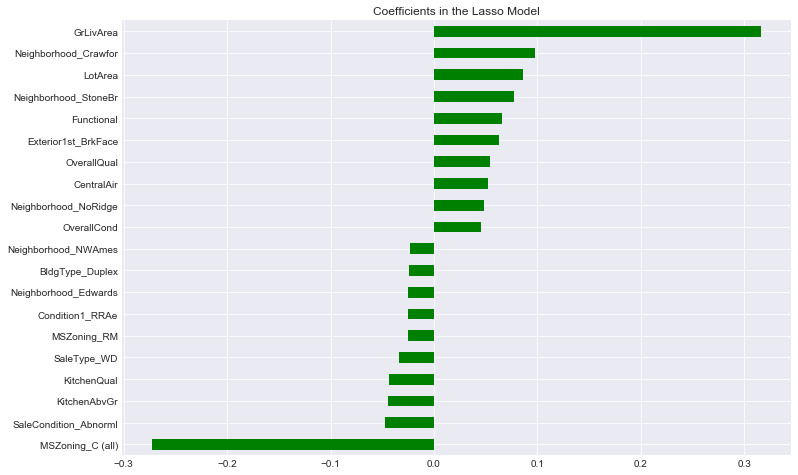

In [319]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize =(12,8), color = "green")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [245]:
Lasso1 = np.round(np.exp(lasso.predict(test)))
pd.DataFrame({'Id': test_ID, 'SalePrice': Lasso1}).to_csv('Lasso.csv', index = False)



# ENet

In [246]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

In [247]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1111 (0.0071)



In [248]:
ENet.fit(train, y)
print (ENet.score(train, y))
ENet.predict(test)

0.9364187209321566


array([11.69296848, 11.93857814, 12.11197484, ..., 12.06947634,
       11.67805902, 12.34064756])

In [249]:
ENet1 = np.round(np.exp(ENet.predict(test)))
pd.DataFrame({'Id': test_ID, 'SalePrice': ENet1}).to_csv('ENet.csv', index = False)

In [46]:
from sklearn import linear_model
# 3* ridge2
ridge = linear_model.Ridge(alpha=0.0005)
ridge.fit(train, y)
print (ridge.score(train, y))
ridge.predict(test)

0.9441855615986555


array([11.71728258, 12.01717425, 12.11400258, ..., 12.08584709,
       11.69779469, 12.32442218])

Ridge picked 220 features and eliminated the other 0 features


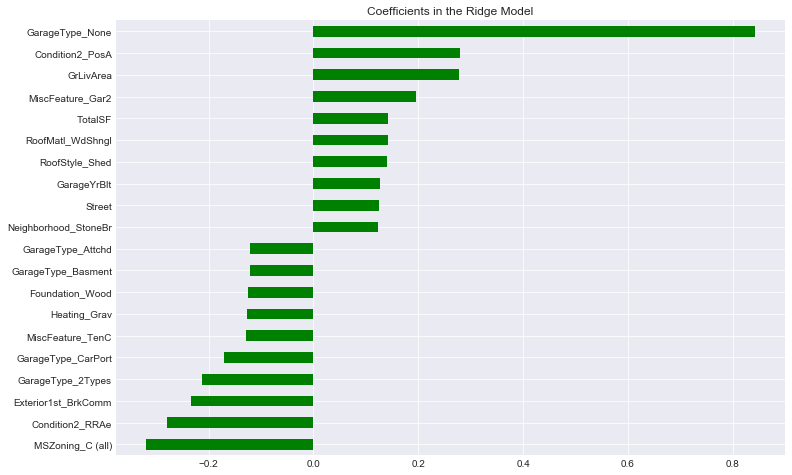

In [318]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize =(12,8), color = "green")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [265]:
ridge2 = np.round(np.exp(ridge.predict(test)))
pd.DataFrame({'Id': test_ID, 'SalePrice': ridge2}).to_csv('ridge2.csv', index = False)

# GBoost

In [38]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


In [43]:
GBoost.fit(train, y)
print (GBoost.score(train, y))
GBoost.predict(test)

0.9846037771029394


array([11.73130563, 11.96902186, 12.19725297, ..., 12.03193055,
       11.71120012, 12.23451647])

In [44]:
GBoost1 = np.round(np.exp(GBoost.predict(test)))
pd.DataFrame({'Id': test_ID, 'SalePrice': GBoost1}).to_csv('GBoost.csv', index = False)

In [270]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


In [271]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1179 (0.0063)



In [272]:
model_xgb.fit(train, y)
print (model_xgb.score(train, y))
model_xgb.predict(test)




0.9611490256508911


array([11.711463, 11.990454, 12.124342, ..., 11.993886, 11.698959,
       12.33867 ], dtype=float32)

In [273]:
model_xgb1 = np.round(np.exp(model_xgb.predict(test)))
pd.DataFrame({'Id': test_ID, 'SalePrice': model_xgb1}).to_csv('model_xgb.csv', index = False)

# SIMPLE AVERAGE


In [ ]:
simple_avg = np.round((GBoost1 + ENet1 + Lasso1)/3)
pd.DataFrame({'Id': test_ID, 'SalePrice': simple_avg}).to_csv('simple_avg.csv', index = False)